# 프로젝트 : 다양한 OCR 비교하기

In [1]:
import matplotlib.pyplot as plt
import keras_ocr
import os
import cv2
import matplotlib.image as image
from glob import glob
import pytesseract
from PIL import Image
from pytesseract import Output

## STEP 1. 검증용 데이터셋 준비
신분증에서 텍스트를 뽑아내는 서비스를 구현할것입니다.
* 다양한 모양의 신분증 사진을 준비합니다.

In [2]:
path = os.getenv('HOME')+'/aiffel/ocr_python/images/'
listpath = glob(path+'*.jpg')
listpath

['/aiffel/aiffel/ocr_python/images/020620a-Inline.jpg',
 '/aiffel/aiffel/ocr_python/images/azdriverlicense-travel-id-800x502.jpg',
 '/aiffel/aiffel/ocr_python/images/960x0.jpg',
 '/aiffel/aiffel/ocr_python/images/mn-adult-dl.jpg',
 '/aiffel/aiffel/ocr_python/images/1140-real-id-kansas.imgcache.rev.web.700.399.jpg']

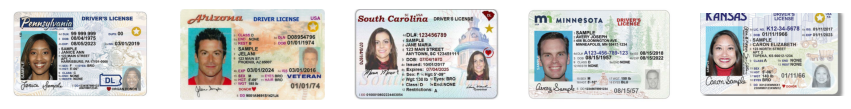

In [3]:
plt.figure(figsize=(15,15))
for idx, img in enumerate(listpath):
    plt.subplot(1,5,idx+1)
    i = image.imread(img)
    plt.imshow(i)
    plt.axis('off')

## STEP 2. 테스트 진행

#### 1.keras_ocr

In [4]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [5]:
images = [ keras_ocr.tools.read(url) for url in listpath]
prediction_groups = [pipeline.recognize([url]) for url in listpath]

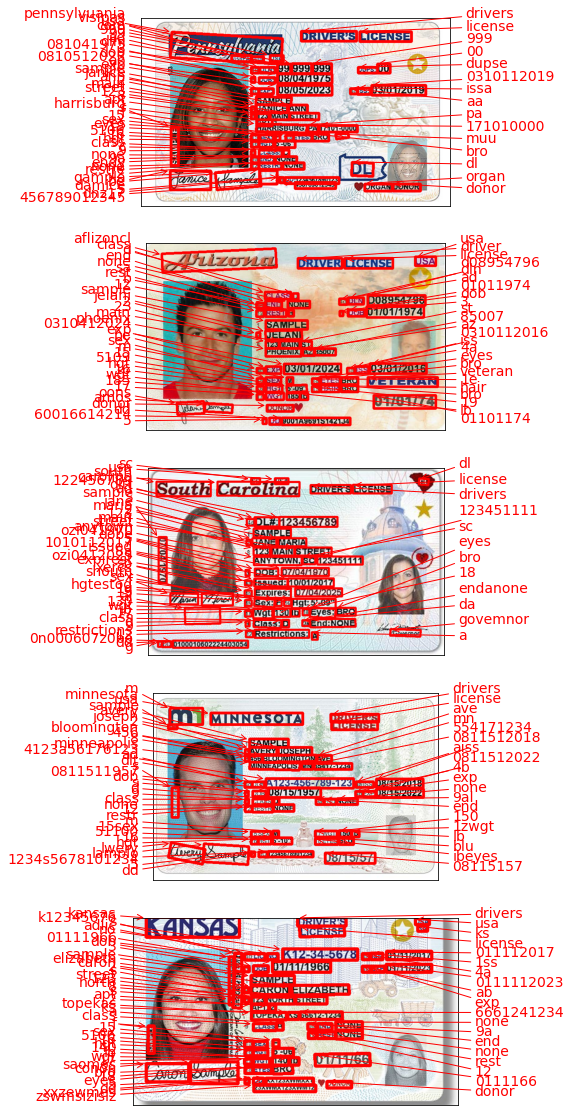

In [6]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

#### 2. tesseract

In [7]:
def crop_word_regions(idx,image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = output_path+str(idx)+"-"+f"{str(index).zfill(4)}.jpg"
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    ret = []
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        ret.append(recognized_data['text'])
    return ret

In [8]:
cropped_image_path_list = []
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/images/'
for i,p in enumerate(listpath):
    cropped_image_path_list.append(crop_word_regions(i,p, work_dir))

In [9]:
cropped_image_path_list[0]

['/aiffel/aiffel/ocr_python/images/0-0000.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0001.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0002.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0003.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0004.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0005.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0006.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0007.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0008.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0009.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0010.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0011.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0012.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0013.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0014.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0015.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0016.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0017.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0018.jpg',
 '/aiffel/aiffel/ocr_python/images/0-0019.jpg',
 '/aiffel/aiffel/ocr_python/images/0-002

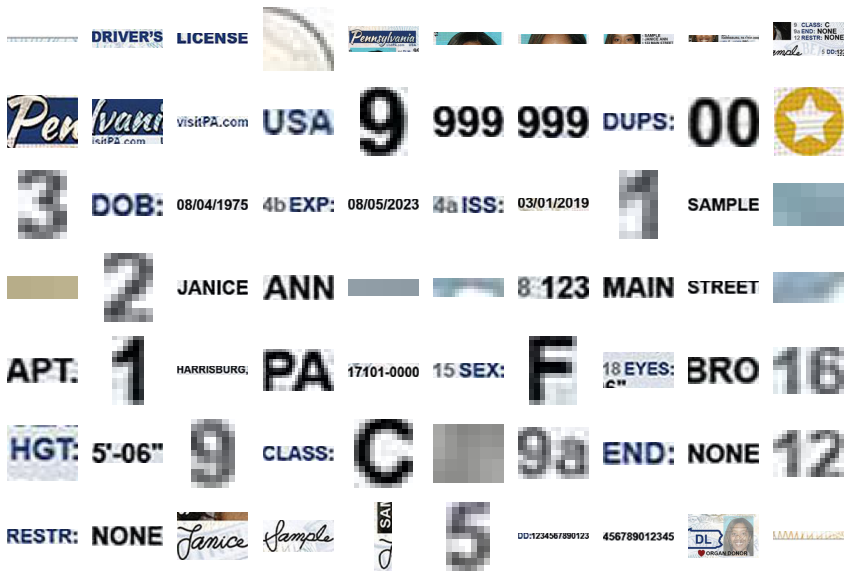

In [10]:
plt.figure(figsize=(15,15))
for idx, img in enumerate(cropped_image_path_list[0]):
    plt.subplot(10,10,idx+1)
    i = image.imread(img)
    plt.imshow(i)
    plt.axis('off')

In [11]:
result = recognize_images(cropped_image_path_list[0])
result

['\x0c',
 'DRIVER’S\n\x0c',
 'LICENSE\n\x0c',
 '>\n\x0c',
 'ETE\n\x0c',
 'i\n\x0c',
 '(CU\n\x0c',
 '\x0c',
 'Fy Geseeiad HaRrissure, pa 17101-0000\n\x0c',
 '\x0c',
 'Fen\n\x0c',
 'EL\n\x0c',
 'VisirA com\n\x0c',
 'USe\n\x0c',
 'QO\n\x0c',
 '999\n\x0c',
 'O99\n\x0c',
 'UUFS:\n\x0c',
 'OD\n\x0c',
 'e?\n\x0c',
 '4\n\x0c',
 'DOR:\n\x0c',
 '08/04/1975\n\x0c',
 'Ab EXP:\n\x0c',
 '08/05/2023\n\x0c',
 '4atss*\n\x0c',
 '03/01/2019\n\x0c',
 '"\n\x0c',
 'SAMPLE\n\x0c',
 '_\n\x0c',
 '_—\n\x0c',
 '\x0c',
 'JANICE\n\x0c',
 'ANN\n\x0c',
 '—\n\x0c',
 '=\n\x0c',
 '84123\n\x0c',
 'VAIN\n\x0c',
 'SiREET\n\x0c',
 '-\n\x0c',
 'Dr T\n\x0c',
 '4\n\x0c',
 'HARRISBURG,\n\x0c',
 'fh\n\x0c',
 '47101-0000\n\x0c',
 '15S SEA:\n\x0c',
 'r\n\x0c',
 '18 EYES:\n\x0c',
 'SiO\n\x0c',
 'Sty\n\x0c',
 'HGT:\n\x0c',
 '06"\n\x0c',
 ')\n\x0c',
 'CLASS:\n\x0c',
 'CO\n\x0c',
 'Zz\n\x0c',
 '9a\n\x0c',
 'NL:\n\x0c',
 'NONE\n\x0c',
 '“7\n\x0c',
 'RES IK.\n\x0c',
 'NONE\n\x0c',
 'Caio\n\x0c',
 'female\n\x0c',
 ':\n\x0c',
 '\x0c',
 '

## STEP 3. 테스트 결과 정리
* 면허증 하나에 대해서 비교해보겠습니다.

(-0.5, 756.5, 458.5, -0.5)

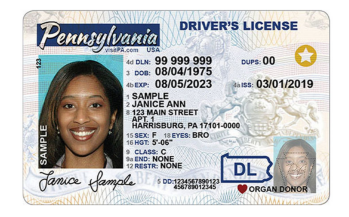

In [12]:
i = image.imread(listpath[0])
plt.imshow(i)
plt.axis('off')

#### keras-ocr의 결과입니다.

<AxesSubplot:>

<Figure size 7200x7200 with 0 Axes>

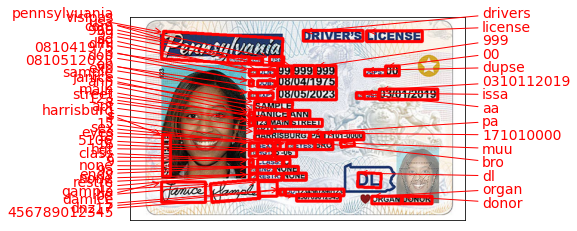

In [13]:
plt.figure(figsize=(100, 100))
keras_ocr.tools.drawAnnotations(image=images[0], 
                                    predictions=prediction_groups[0][0])

* 날짜나 일련번호에 대해 인식이 정확하지 않습니다.
* /를 1로 인식하고 -는 아예 인식하지 못합니다.

#### tesseract의 결과입니다.

In [14]:
result = recognize_images(cropped_image_path_list[0])
result

['\x0c',
 'DRIVER’S\n\x0c',
 'LICENSE\n\x0c',
 '>\n\x0c',
 'ETE\n\x0c',
 'i\n\x0c',
 '(CU\n\x0c',
 '\x0c',
 'Fy Geseeiad HaRrissure, pa 17101-0000\n\x0c',
 '\x0c',
 'Fen\n\x0c',
 'EL\n\x0c',
 'VisirA com\n\x0c',
 'USe\n\x0c',
 'QO\n\x0c',
 '999\n\x0c',
 'O99\n\x0c',
 'UUFS:\n\x0c',
 'OD\n\x0c',
 'e?\n\x0c',
 '4\n\x0c',
 'DOR:\n\x0c',
 '08/04/1975\n\x0c',
 'Ab EXP:\n\x0c',
 '08/05/2023\n\x0c',
 '4atss*\n\x0c',
 '03/01/2019\n\x0c',
 '"\n\x0c',
 'SAMPLE\n\x0c',
 '_\n\x0c',
 '_—\n\x0c',
 '\x0c',
 'JANICE\n\x0c',
 'ANN\n\x0c',
 '—\n\x0c',
 '=\n\x0c',
 '84123\n\x0c',
 'VAIN\n\x0c',
 'SiREET\n\x0c',
 '-\n\x0c',
 'Dr T\n\x0c',
 '4\n\x0c',
 'HARRISBURG,\n\x0c',
 'fh\n\x0c',
 '47101-0000\n\x0c',
 '15S SEA:\n\x0c',
 'r\n\x0c',
 '18 EYES:\n\x0c',
 'SiO\n\x0c',
 'Sty\n\x0c',
 'HGT:\n\x0c',
 '06"\n\x0c',
 ')\n\x0c',
 'CLASS:\n\x0c',
 'CO\n\x0c',
 'Zz\n\x0c',
 '9a\n\x0c',
 'NL:\n\x0c',
 'NONE\n\x0c',
 '“7\n\x0c',
 'RES IK.\n\x0c',
 'NONE\n\x0c',
 'Caio\n\x0c',
 'female\n\x0c',
 ':\n\x0c',
 '\x0c',
 '

* 이스케이프 문자까지 같이 뽑아내 알아보기 좀 어렵지만 일련번호는 어느정도 잘뽑아내고 날짜에 대해서는 정확히 뽑아내는 모습입니다.

## STEP 4. 결과 분석과 결론
* 각각 장단점을 보자면 keras-ocr은 문자는 잘 찾아내지만 /,-같은 특수문자를 찾아내지 못합니다.  
하지만 tesseract의 경우 문자에 대해서는 자꾸 잘리는 경우는 있지만 특수문자를 잘 찾아냅니다.

* 따라서 두 모델을 함께 사용해 서로 모자란 부분을 커버하는 것으로 서비스의 정확도를 향상시킬수 있을것이라 생각됩니다.